

---



In [1]:
!pip install torchsummary

In [2]:

import numpy as np              # for numerical computationss
import pandas as pd             # for working with dataframes
from PIL import Image           # for checking images
import shutil
from collections import defaultdict
import os
import torch  # Pytorch module
import torch.nn as nn # for creating  neural networks
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn.functional as F   # for functions for calculating loss
from torch.autograd import Variable
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder  # for working with classes and images
from torchvision.utils import make_grid
from torchsummary import summary
import matplotlib.pyplot as plt # for plotting informations on graph and images using tensors



In [7]:
training_dataset = '/home/jovyan/dataset/Train'
testing_dataset = '/home/jovyan/dataset/Validation'
classes = os.listdir(training_dataset)
print(classes)

['American Bollworm on Cotton', 'Anthracnose on Cotton', 'Army worm', 'Becterial Blight in Rice', 'Brownspot', 'Common_Rust', 'Cotton Aphid', 'Flag Smut', 'Gray_Leaf_Spot', 'Healthy Maize', 'Healthy Wheat', 'Healthy cotton', 'Leaf Curl', 'Leaf smut', 'Mosaic sugarcane', 'RedRot sugarcane', 'RedRust sugarcane', 'Rice Blast', 'Sugarcane Healthy', 'Tungro', 'Wheat Brown leaf Rust', 'Wheat Stem fly', 'Wheat aphid', 'Wheat black rust', 'Wheat leaf blight', 'Wheat mite', 'Wheat powdery mildew', 'Wheat scab', 'Wheat___Yellow_Rust', 'Wilt', 'Yellow Rust Sugarcane', 'bacterial_blight in Cotton', 'bollrot on Cotton', 'bollworm on Cotton', 'cotton mealy bug', 'cotton whitefly', 'maize ear rot', 'maize fall armyworm', 'maize stem borer', 'pink bollworm in cotton', 'red cotton bug', 'thirps on  cotton']


In [8]:
# prompt: i want to count the number of all folders, the number of folders that contain not healthy classes and the number of healty classes. The healthy classes include the word "healthy" in their folder name.

# Count the total number of folders
total_classes = len(classes)

# Count the number of folders that contain "healthy" in their name
healthy_classes = 0
unhealthy_classes = 0

for class_name in classes:
    if "healthy" in class_name.lower():
        healthy_classes += 1
    else:
        unhealthy_classes += 1

print(f"Total number of folders: {total_classes}")
print(f"Number of folders with unhealthy classes: {unhealthy_classes}")
print(f"Number of healthy classes: {healthy_classes}")

Total number of folders: 42
Number of folders with unhealthy classes: 38
Number of healthy classes: 4


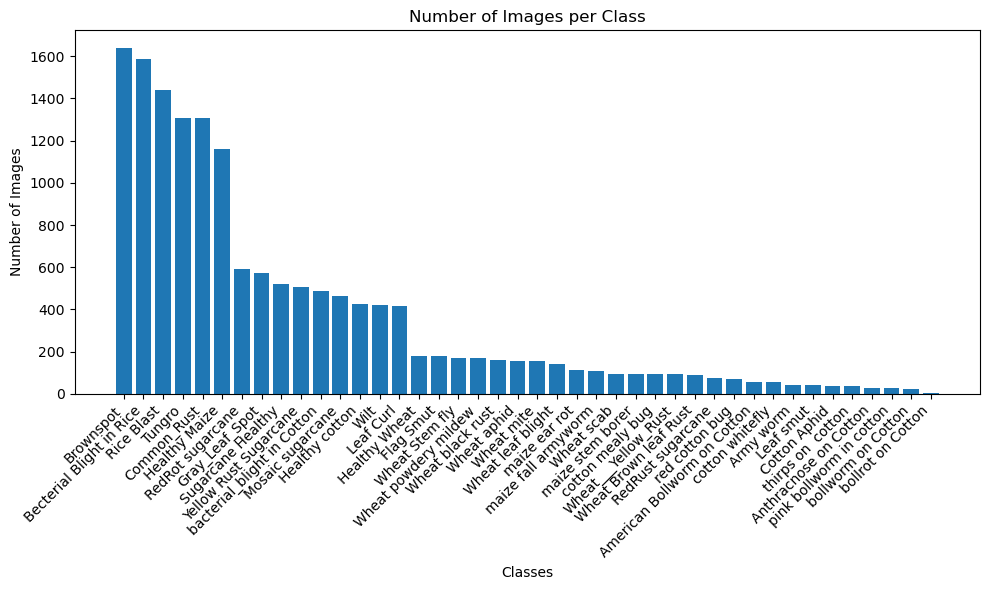

In [9]:
# Count the number of images in each folder
image_counts = {}
for class_name in classes:
    class_path = os.path.join(training_dataset, class_name)
    image_count = len(os.listdir(class_path))
    image_counts[class_name] = image_count

# Sort the image counts in descending order
sorted_image_counts = dict(sorted(image_counts.items(), key=lambda item: item[1], reverse=True))


# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(sorted_image_counts.keys(), sorted_image_counts.values())
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.title("Number of Images per Class")
plt.xticks(rotation=45, ha="right") # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [10]:
# Create a DataFrame from the sorted image counts
df = pd.DataFrame(list(sorted_image_counts.items()), columns=['Class', 'Image Count'])

# Display the DataFrame as a table
df

,Class,Image Count
0,Brownspot,1640
1,Becterial Blight in Rice,1584
2,Rice Blast,1440
3,Tungro,1308
4,Common_Rust,1306
5,Healthy Maize,1162
6,RedRot sugarcane,592
7,Gray_Leaf_Spot,574
8,Sugarcane Healthy,522
9,Yellow Rust Sugarcane,505


In [11]:

test_classes = os.listdir(testing_dataset)

# Count the number of images in each folder of the testing dataset
image_counts_test = {}
for class_name in test_classes:
    class_path = os.path.join(testing_dataset, class_name)
    image_count = len(os.listdir(class_path))
    image_counts_test[class_name] = image_count

# Sort the image counts in descending order
sorted_image_counts_test = dict(sorted(image_counts_test.items(), key=lambda item: item[1], reverse=True))

# Create a DataFrame from the sorted image counts
df_test = pd.DataFrame(list(sorted_image_counts_test.items()), columns=['Class', 'Image Count'])

# Display the DataFrame as a table
df_test

,Class,Image Count
0,Wilt,419
1,Army worm,351
2,Cotton Aphid,287
3,Bacterial Blight in cotton,284
4,Healthy Maize,275
5,Healthy cotton,176
6,RedRot sugarcane,153
7,Sugarcane Healthy,94
8,Leaf Curl,81
9,maize fall armyworm,76


In [29]:
# Path of the folder to delete
folder_path = '/home/jovyan/dataset/Train/Healthy Wheat/Wheat___Healthy'

# Check if the folder exists
if not os.path.exists(folder_path):
    print(f"This folder has already been emptied and deleted: '{folder_path}'")
else:
    try:
        shutil.rmtree(folder_path)  # Attempt to delete the folder
        print(f"Folder '{folder_path}' deleted successfully.")
    except FileNotFoundError:
        print(f"Folder '{folder_path}' not found.")
    except OSError as e:
        print(f"Error deleting folder '{folder_path}': {e}")


This folder has already been emptied and deleted: '/home/jovyan/dataset/Train/Healthy Wheat/Wheat___Healthy'


In [30]:
combined_dataset = '/home/jovyan/dataset/Combined'

# Renaming folder/class names and unifying them

In [31]:
# Function to generate unified folder names
def unify_folder_name(folder_name):
    # Convert to lowercase and replace spaces or special characters with underscores
    return folder_name.lower().replace(" ", "_").replace("-", "_").replace("___", "_").replace("__", "_")

# Get the list of folder names in the combined dataset
folders = os.listdir(combined_dataset)

# Rename folders to their unified names
for folder in folders:
    old_folder_path = os.path.join(combined_dataset, folder)
    if os.path.isdir(old_folder_path):
        # Generate the new folder name
        unified_name = unify_folder_name(folder)
        new_folder_path = os.path.join(combined_dataset, unified_name)

        # Rename the folder
        if old_folder_path != new_folder_path:  # Avoid renaming to the same name
            os.rename(old_folder_path, new_folder_path)
            print(f"Renamed '{folder}' to '{unified_name}'")


print("All folder names have been already unified.")


All folder names have been already unified.


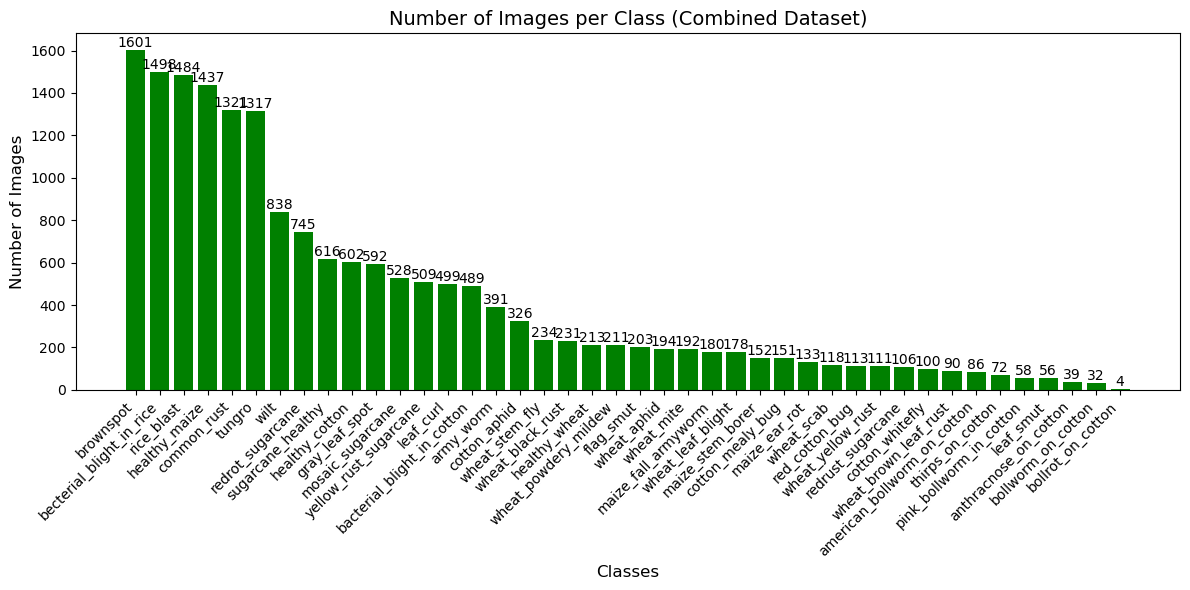

In [32]:
# Count images in the combined dataset
combined_image_counts = {}
for class_name in os.listdir(combined_dataset):
    class_path = os.path.join(combined_dataset, class_name)
    image_count = len(os.listdir(class_path))
    combined_image_counts[class_name] = image_count

# Sort the image counts in descending order
sorted_combined_image_counts = dict(sorted(combined_image_counts.items(), key=lambda item: item[1], reverse=True))

# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size for better visualization
bars = plt.bar(sorted_combined_image_counts.keys(), sorted_combined_image_counts.values(), color='green')
plt.xlabel("Classes", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.title("Number of Images per Class (Combined Dataset)", fontsize=14)

# Add the count on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=10)

plt.xticks(rotation=45, ha="right", fontsize=10)  # Rotate x-axis labels
plt.tight_layout()
plt.show()

In [33]:
# prompt: create a table to show the number of images in each folder of the combined dataset.

# Create a DataFrame from the sorted combined image counts
df_combined = pd.DataFrame(list(sorted_combined_image_counts.items()), columns=['Class', 'Image Count'])

# Display the DataFrame as a table
df_combined

,Class,Image Count
0,brownspot,1601
1,becterial_blight_in_rice,1498
2,rice_blast,1484
3,healthy_maize,1437
4,common_rust,1321
5,tungro,1317
6,wilt,838
7,redrot_sugarcane,745
8,sugarcane_healthy,616
9,healthy_cotton,602


In [34]:
# Calculate the total number of images in the combined dataset
total_combined_images = sum(sorted_combined_image_counts.values())

print(f"Total number of images in the combined dataset: {total_combined_images}")

Total number of images in the combined dataset: 18050


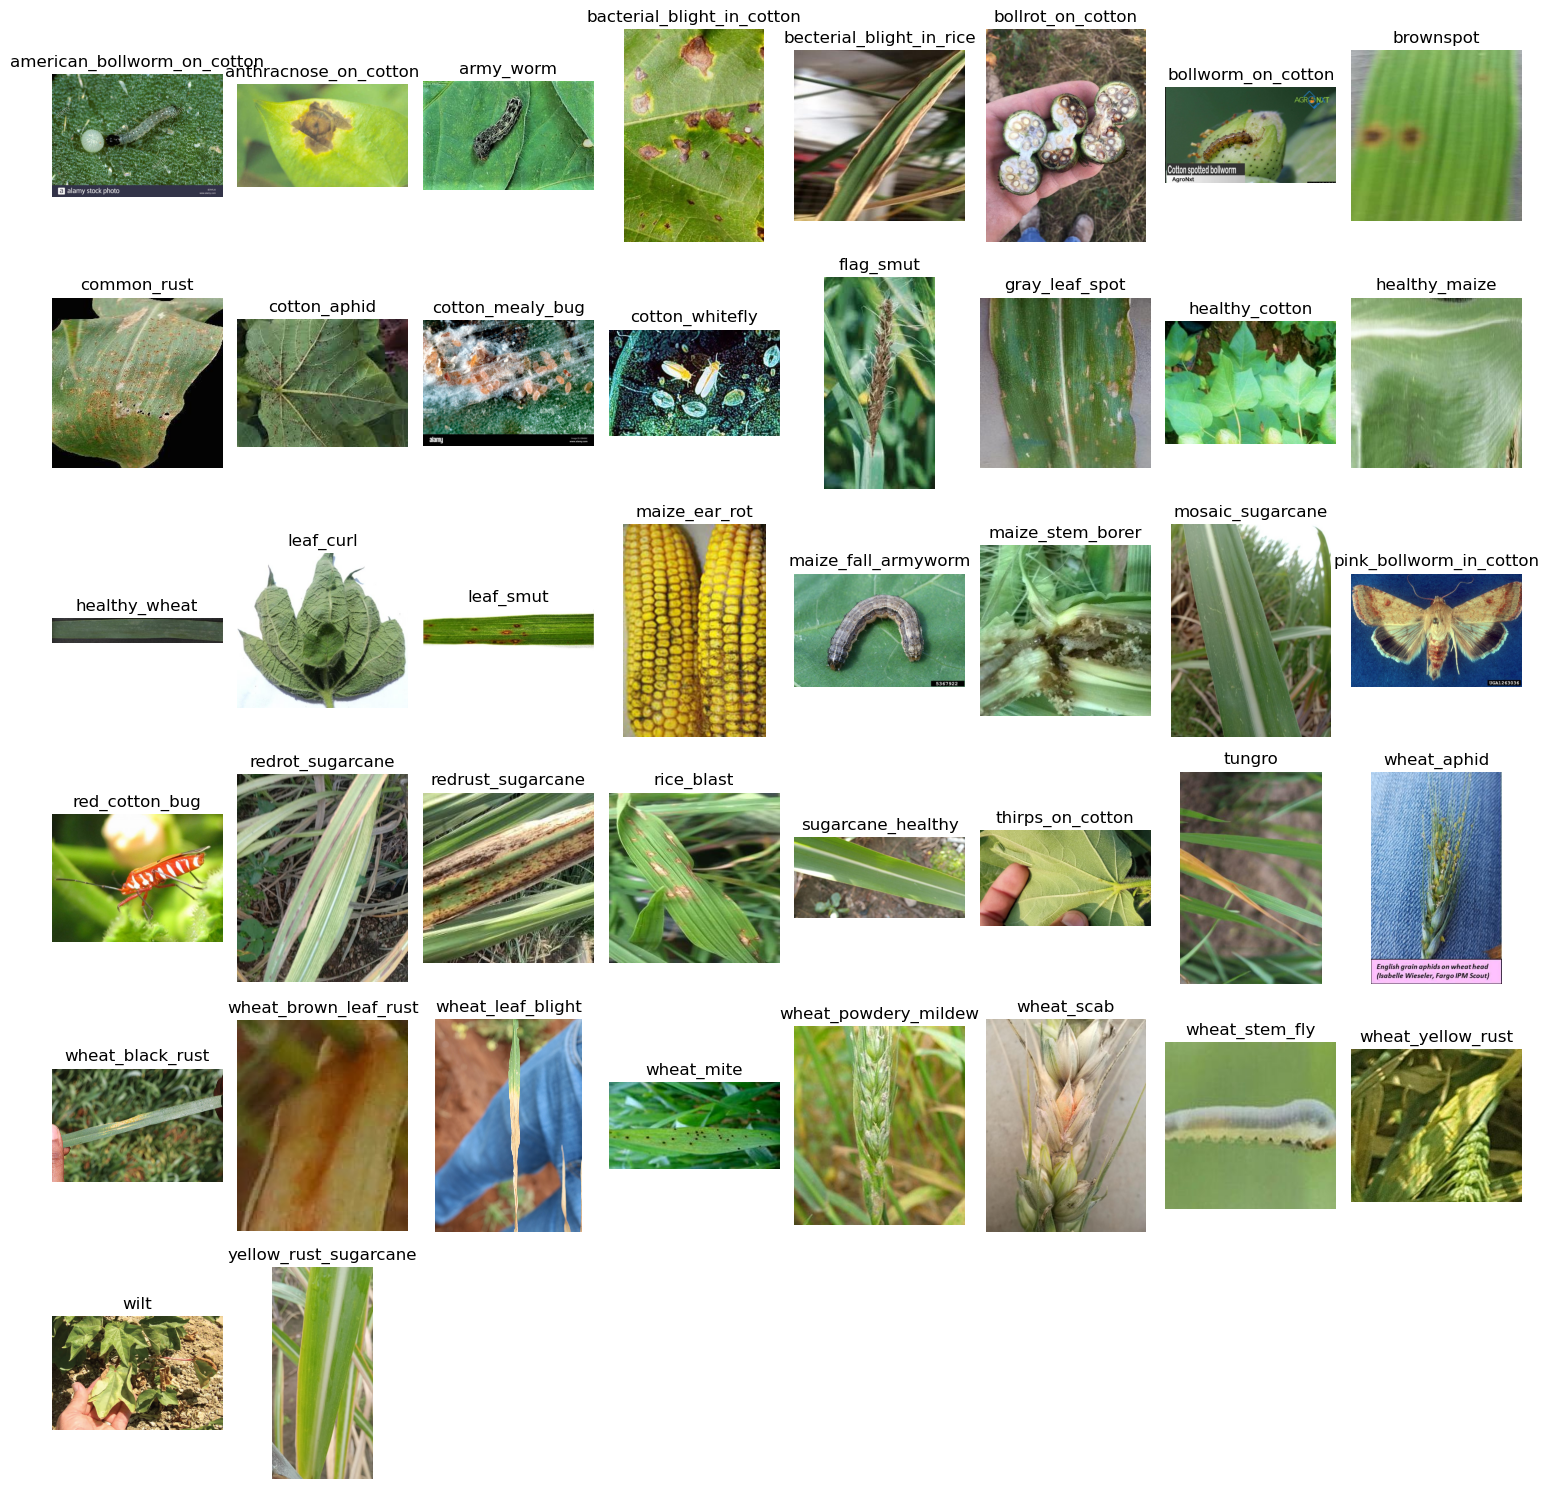

In [35]:
# Get the list of folder names (classes) in the combined dataset
classes = sorted([folder for folder in os.listdir(combined_dataset) if os.path.isdir(os.path.join(combined_dataset, folder))])

# Set up a grid for displaying images
plt.figure(figsize=(15, 15))
columns = 8  # Number of columns in the grid
rows = (len(classes) + columns - 1) // columns  # Calculate the number of rows

# Display one image per class
for i, class_name in enumerate(classes):
    class_folder = os.path.join(combined_dataset, class_name)
    image_files = [file for file in os.listdir(class_folder) if os.path.isfile(os.path.join(class_folder, file))]

    if image_files:  # Ensure the folder contains images
        image_path = os.path.join(class_folder, image_files[0])  # Select the first image in the folder
        img = Image.open(image_path)  # Open the image

        # Add the image to the grid
        plt.subplot(rows, columns, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(class_name)

# Adjust layout and display the grid
plt.tight_layout()
plt.show()


# DATA TRANSFORMATION

In [36]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# Define transformations
transform = transforms.Compose([
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),  # Random resize and crop to 224x224
    transforms.RandomRotation(degrees=15),  # Add random rotation
    transforms.RandomHorizontalFlip(),  # Add random horizontal flip
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Add color jitter
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize using ImageNet stats
])

In [37]:
# Load the dataset with transformations
#full_dataset = datasets.ImageFolder(root=combined_dataset, transform=transform)


In [38]:
# Custom loader to ensure images are converted to RGBA and then to RGB
def custom_loader(path):
    with open(path, 'rb') as f:
        img = Image.open(f)
        if img.mode == "P" or img.mode == "LA":
            img = img.convert("RGBA")  # Convert palette or LA images to RGBA
        return img.convert("RGB")  # Finally convert to RGB

# Apply the custom loader to the dataset
from torchvision.datasets import ImageFolder

full_dataset = ImageFolder(
    root='/home/jovyan/dataset/Combined',
    transform=transform,
    loader=custom_loader  # Use the custom loader
)


In [39]:
# Define split ratios
train_ratio = 0.6
val_ratio = 0.2
test_ratio = 0.2

In [40]:
# Compute split sizes
train_size = int(train_ratio * len(full_dataset))
val_size = int(val_ratio * len(full_dataset))
test_size = len(full_dataset) - train_size - val_size


In [41]:
# Split the dataset
train_dataset, val_dataset, test_dataset = random_split(full_dataset, [train_size, val_size, test_size])


In [42]:
# Create DataLoaders
batch_size = 50  # Define the batch size
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [43]:
# Verify the setup
print(f"Total images: {len(full_dataset)}")
print(f"Training images: {len(train_dataset)}")
print(f"Validation images: {len(val_dataset)}")
print(f"Testing images: {len(test_dataset)}")

Total images: 18044
Training images: 10826
Validation images: 3608
Testing images: 3610


# Choosing which CNN models we will train

# Model No2: EfficientNet
def create_efficientnet_model():
    model = models.efficientnet_b0(pretrained=True)  # Load pretrained EfficientNet
    for param in model.parameters():
        param.requires_grad = False  # Freeze all layers

    # Replace the final classification layer
    model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
    return model

# Model No3: DenseNet
def create_densenet_model():
    model = models.densenet121(pretrained=True)  # Load pretrained DenseNet121
    for param in model.parameters():
        param.requires_grad = False  # Freeze all layers

    # Replace the final classification layer
    model.classifier = nn.Linear(model.classifier.in_features, num_classes)
    return model

In [44]:
from torchvision import models

# Define the number of classes (42 for your crop disease dataset)
num_classes = len(os.listdir('/home/jovyan/dataset/Combined'))

# Model No1: ResNet
def create_resnet_model():
    model = models.resnet18(pretrained=True)  # Load pretrained ResNet18
    for param in model.parameters():
        param.requires_grad = False  # Freeze all layers

    # Replace the final fully connected layer for our dataset
    model.fc = nn.Linear(model.fc.in_features, num_classes)
    return model


# Load one model for now (e.g., ResNet)
model = create_resnet_model()
print(model)


/opt/conda/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

# Defining the Loss Function

In [45]:
# choosing the Loss Function

criterion = nn.CrossEntropyLoss()


# Define the Optimzer and the learning rate

In [46]:
# Adam:
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# SGD (Stochastic Gradient Descent):
#optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# AdamW (A variation of Adam that improves regularization with weight decay):
#optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)


# Define the Adam Optimizer

In [47]:
# Define the Adam optimizer
learning_rate = 0.01  # Typical starting learning rate for Adam
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
print(f"Optimizer set to Adam with learning rate {learning_rate}.")


Optimizer set to Adam with learning rate 0.01.


# Training Loop

## **Common Learning Rate Schedulers**

### **StepLR:**
Reduces the learning rate by a factor (e.g., 0.1) after a fixed number of epochs.
Example: Reduce every 10 epochs.

**Best for:** Stable and well-behaved training where the loss decreases steadily over time.

  **Parameters:**

  **step_size:**
  The number of epochs after which the learning rate is reduced.
  Example: step_size=10 reduces the learning rate every 10 epochs.
  **gamma:**
  The factor by which the learning rate is multiplied when reduced.
  Example: gamma=0.1 means the learning rate is reduced to 10% of its current value.

  **Example Behavior:**

  Initial LR: 0.01
  After 10 epochs: 0.001 (multiplied by 0.1)
  After 20 epochs: 0.0001

### **ReduceLROnPlateau:**

Reduces the learning rate when the validation loss stops improving.
Dynamically adapts to training progress, often leading to better results.

**Best for:** When the validation loss plateaus unpredictably or early stopping is used.

  **Parameters:**

  **mode:**
  Whether to minimize ('min') or maximize ('max') the monitored metric.
  Example: 'min' for validation loss, 'max' for accuracy.

  **patience:**
  The number of epochs with no improvement before reducing the learning rate.
  Example: patience=3 means the LR is reduced if no improvement occurs in 3 epochs.

  **factor:**
  The factor by which the learning rate is multiplied when reduced.
  Example: factor=0.1 reduces the LR to 10% of its current value.

  **threshold:**
  The minimum change in the monitored metric to qualify as an improvement.
  Example: threshold=1e-4 ignores changes smaller than 0.0001.

  **Example Behavior:**

  Initial LR: 0.001
  After 3 stagnant epochs: 0.0001

### **CosineAnnealingLR:**

Cycles the learning rate following a cosine curve, with a gradual decrease over time.
Can improve convergence in some tasks.

**Best for:** Tasks where training dynamics benefit from warm restarts or non-linear decay.

  **Parameters:**

  **T_max:**
  The maximum number of epochs for one learning rate cycle.
  Example: T_max=10 resets the learning rate every 10 epochs.

  **eta_min:**
  The minimum learning rate at the end of each cycle.
  Example: eta_min=0.0 reduces LR to 0 before resetting.

  **Example Behavior:**

  Initial LR: 0.01
  Gradual decrease to 0.0 over T_max epochs, then reset.

In [48]:
# StepLR:
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

# ReduceLROnPlateau
# scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=3, factor=0.1)

# CosineAnnealingLR:
# scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)


## ReduceLROnPlateau Scheduler

In [49]:
# Define the learning rate scheduler
#scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=3, factor=0.1)
#print("Learning rate scheduler set to ReduceLROnPlateau with patience=3 and factor=0.1.")


In [50]:
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)


# Implementing the Training Loop

### **Set Up the Device**
Check for GPU availability and move the model to the appropriate device.

In [51]:
# Check for GPU availability
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Move the model to the device
model = model.to(device)

Using device: cuda


### **Initialize Training Parameters**
In this step we set up the number of epochs and lists for tracking loss history.

In [52]:
# Training loop parameters
num_epochs = 15  # Number of epochs
train_loss_history = []  # Track training loss for each epoch
val_loss_history = []  # Track validation loss for each epoch
best_val_loss = float('inf')  # Initialize best validation loss as infinity

### **Training Loop**

In [ ]:

import time

# Early stopping parameters
patience = 3  # Stop training if validation loss does not improve for 3 consecutive epochs
best_val_loss = float('inf')
early_stopping_counter = 0

# Move the model to the device (GPU if available)
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#model = model.to(device)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    print(f"\nEpoch {epoch + 1}/{num_epochs}")
    start_time = time.time()

    # Training phase
    model.train()
    train_loss = 0.0
    for batch_idx, (inputs, labels) in enumerate(train_loader, start=1):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()  # Clear gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

        train_loss += loss.item()

        # Print batch progress
        if batch_idx % 1 == 0 or batch_idx == len(train_loader):  # Every 1 batche or last batch
            print(f"Batch {batch_idx}/{len(train_loader)}: Training Loss: {loss.item():.4f}")

    train_loss /= len(train_loader)  # Average training loss

    # Validation phase
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch_idx, (inputs, labels) in enumerate(val_loader, start=1):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Print validation batch progress
            if batch_idx % 10 == 0 or batch_idx == len(val_loader):  # Every 10 batches or last batch
                print(f"Validation Batch {batch_idx}/{len(val_loader)}: Validation Loss: {loss.item():.4f}")

    val_loss /= len(val_loader)  # Average validation loss

    # Scheduler step
    scheduler.step()

    # Print results for this epoch
    current_lr = scheduler.get_last_lr()[0]  # Get the current learning rate
    print(f"Epoch {epoch + 1} Summary:")
    print(f" - Train Loss: {train_loss:.4f}")
    print(f" - Val Loss: {val_loss:.4f}")
    print(f" - Learning Rate: {current_lr:.6f}")
    print(f" - Time Taken: {time.time() - start_time:.2f}s")

    # Early stopping logic
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stopping_counter = 0
        torch.save(model.state_dict(), "best_model.pth")  # Save the best model
        print("Validation loss improved. Model saved.")
    else:
        early_stopping_counter += 1
        print(f"No improvement in validation loss. Early stopping counter: {early_stopping_counter}/{patience}")

    if early_stopping_counter >= patience:
        print("Early stopping triggered. Training stopped.")
        break

# Load the best model for further evaluation or testing
model.load_state_dict(torch.load("best_model.pth"))
print("Best model loaded for evaluation.")



Epoch 1/10
Batch 1/217: Training Loss: 3.8654
Batch 2/217: Training Loss: 4.3055
Batch 3/217: Training Loss: 4.0052
Batch 4/217: Training Loss: 4.8177
Batch 5/217: Training Loss: 5.9482
Batch 6/217: Training Loss: 4.2866
Batch 7/217: Training Loss: 4.6020
Batch 8/217: Training Loss: 5.1085
Batch 9/217: Training Loss: 6.5478
Batch 10/217: Training Loss: 4.3706
Batch 11/217: Training Loss: 4.4990
Batch 12/217: Training Loss: 2.6252
Batch 13/217: Training Loss: 3.7932
Batch 14/217: Training Loss: 4.3701
Batch 15/217: Training Loss: 3.9516
Batch 16/217: Training Loss: 2.9338
Batch 17/217: Training Loss: 2.4257
Batch 18/217: Training Loss: 4.2009
Batch 19/217: Training Loss: 2.9109
Batch 20/217: Training Loss: 3.5032
Batch 21/217: Training Loss: 2.3766
Batch 22/217: Training Loss: 2.1914
Batch 23/217: Training Loss: 2.3098
Batch 24/217: Training Loss: 3.2709
Batch 25/217: Training Loss: 2.1999
Batch 26/217: Training Loss: 1.9437
Batch 27/217: Training Loss: 3.0140
Batch 28/217: Training Lo